# Quickstart for turbulent non-Newtonian flow

[![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/rheopy/rheoflow/blob/master/notebooks/index.ipynb)

In [ ]:
rheoflow_installation = 'rheoflow not installed' 
if (rheoflow_installation == 'rheoflow not installed'):
    !pip3 install git+https://github.com/rheopy/rheoflow.git

## Turbulent Flow of Non-Newtonian Fluids - Dodge Metzner Figure 12
D.W. Dodge and A.B. Metzner, Turbulent Flow of Non-Newtonian Systems, AIChE J 5(2), 189-204 (1959).

![caption](dodge_metzner_fig12.png)

## Import python libraries for numerics

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spo
from scipy.optimize import fsolve
%matplotlib inline

from rheoflow import friction_factor_property as f

import warnings
warnings.filterwarnings("ignore")

## Create functions for Dodge-Metzner Reynolds number and friction factor

$Re_{dm} = \frac{\rho D^n U^{2-n}}{8^{n-1}k}$

$f_{laminar} = \frac{16}{Re_{dm}} $ for $f<0.008$

$\frac{1}{\sqrt{f}} - \frac{4}{n^{0.75}} Log_{10} \left( Re_{dm} f_{dm}^{1-\frac{n}{2}} \right) + \frac{0.4}{n^{1.2}} = 0 $

In [43]:
def re_dm(rho,d,v,k,n):
    return d**n * v**(2.-n) * rho / (k*8.0**(n-1.))

def f_dm(re,n):
    f_laminar = 16./(np.abs(re)+1.0e-9)
    if (f_laminar < 0.008):
        f_dodgemetz = lambda x: np.sqrt(1.0/(x+1.e-9)) - 4.0/n**0.75*np.log10(re*(x+1.e-9)**(1.-n/2.)) + 0.4/n**1.2
        f_fanning = spo.brentq( f_dodgemetz, 0., 1.e+4)
        if (np.isclose([n],[2.0])):
            f_fanning = (1./(4./2.**.75*np.log10(re)-.4/2.**1.2))**2
    else:
        f_fanning = f_laminar
    return np.abs(f_fanning)

## Reproduce Figure 12

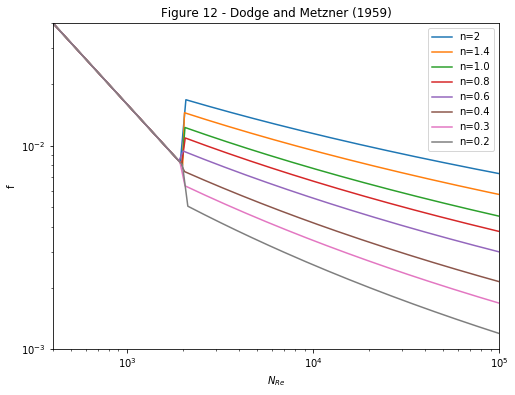

In [44]:
plt.figure(figsize=(8,6))
rho=1000.
k = .1
d = .1

# Special case for n=2
d_list = np.logspace(-1,2,201)
re_list = list(map(lambda x: re_dm(rho,x,1.,k,2.),d_list))
f_list = list(map(lambda x: f_dm(x,2.),re_list))
plt.loglog(re_list,f_list,'-',label='n='+str(2))

# Plot f for n's in Didge-Metzner paper
v = np.logspace(-3.,5.,501)
n_list = [1.4,1.0,.8,.6,.4,.3,.2]
for i,n in enumerate(n_list):
    re_list = list(map(lambda x: re_dm(rho,d,x,k,n=n),v))
    f_list = list(map(lambda x: f_dm(x,n),re_list))
    plt.loglog(re_list,f_list,'-',label='n='+str(n_list[i]))

plt.xlim([400.,100000.])
plt.ylim([.001,.04])
plt.legend()
plt.xlabel('$N_{Re}$')
plt.ylabel('f')
plt.title('Figure 12 - Dodge and Metzner (1959)');

## Example Dodge-Metzner friction factor calculation for power-law viscosity model

In [13]:
re = 1.e+5
n=.5

f_dm(re,n)

0.002586428926781602